In [4]:
import cv2
import numpy as np


## FOR LOG
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
########################################################
## 최초 실행 당시의 얼굴의 크기를 Window로 잡습니다.   ##
## 상하좌우 움직임에서는 MeanShift가 정상 작동하지만,  ##
## 앞뒤 움직임에서는 MeanShift가 고장나버립니다.       ##
########################################################

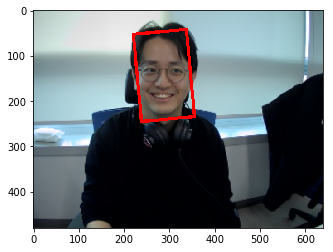

In [6]:
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

#print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

ret, frame = cap.read()

face_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_frontalface_alt_tree.xml')
face_rects = face_cascade.detectMultiScale(frame) # face_rects [[224 107 127 127]]
    
(face_x, face_y, w, h) = tuple(face_rects[0])
track_window = (face_x, face_y, w, h) # track_window (224 107 127 127)
    
roi = frame[face_y:face_y + h, face_x:face_x+face_x + w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
hsv_roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])

cv2.normalize(hsv_roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 2)
    # Count가 최소 10번 혹은 EPS(앱실론)이 1이 될 때까지

while True:
    
    ret, frame = cap.read()
    
    if ret == True:
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        destination = cv2.calcBackProject([hsv_frame], [0], hsv_roi_hist, [0, 100], 1)
        
        ####################################################################################
        ## CAMShift
        
        ret, track_window = cv2.CamShift(destination, track_window, term_crit)
        
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        image2 = cv2.polylines(frame, [pts], True, (0, 0, 255), 5)
        
        ##
        ####################################################################################
        
        cv2.imshow('image', image2)
        
        ####################################################################################
        ## FOR LOG
        cvt_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        plt.imshow(cvt_image)
        ##
        ####################################################################################
        
        k = cv2.waitKey(100) & 0xFF
        if k == ord('q'):
            break
        elif k == 27:
            break
            
    else:
        break
    
cv2.destroyAllWindows()
cap.release()